<a ><img src = "machine-learning.jpg" width = 600, align = "center"></a>

# <center>Machine Learning Contd</center>

In [ ]:
bit.ly/PDCdata001

## Logistic Regression

**Logistic Regression** is the special case of linear regression where dependent or output variable is categorical. Don't be confused by the name of logistic regression, its a classification algorithm. Logistic in logistic regression comes from the function which is the core of this algorithm. This function is **logistic function** or **sigmoid function** . Logistic function can be written as : 

$$\frac{1}{1 + e^{-z}}$$

**import useful libraries**

In [2]:
# !pip install pandas-profiling
# !pip install cufflinks
# !pip install plotly
# # conda install -c anaconda pandas-profiling
# # conda install -c anaconda nbextensions

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling as pf
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
import plotly.offline
import cufflinks as cf
import warnings
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
sb.set(style='ticks')
rcParams['figure.figsize'] = 5,5
warnings.filterwarnings("ignore")
%matplotlib inline

**load the train data**

In [4]:
# Read Test and Train
train_df = pd.read_csv("bank_loan.csv")

In [5]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train_df.shape

(614, 13)

In [6]:
print("There are {} observations(rows) and {} columns in our dataset".format(train_df.shape[0],train_df.shape[1]))

There are 614 observations(rows) and 13 columns in our dataset


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


**preview first 10 rows**

In [ ]:
train_df.head(10)

In [9]:
# we create an interactive visualization of the entire data using plotly
train_df.iplot()

## **EXPLORATORY DATA ANALYSIS**

In [10]:
# let us first check to see if our data has any missing values
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Are any of the observations duplicated?
train_df.duplicated().sum()

0

<div class="alert alert-block alert-info">
<b>Univariate Analysis:</b> 
</div>

In [12]:
# list categorical features or columns
categorical_features = []

for i in train_df.columns:
    if train_df[i].dtype == object:
        categorical_features.append(i)   

print('The categorical columns are: ')
print('+_+'*35)
print(categorical_features)     
print('+_+'*35)

The categorical columns are: 
+_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_+
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
+_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_+


**we visualize our categorical features**

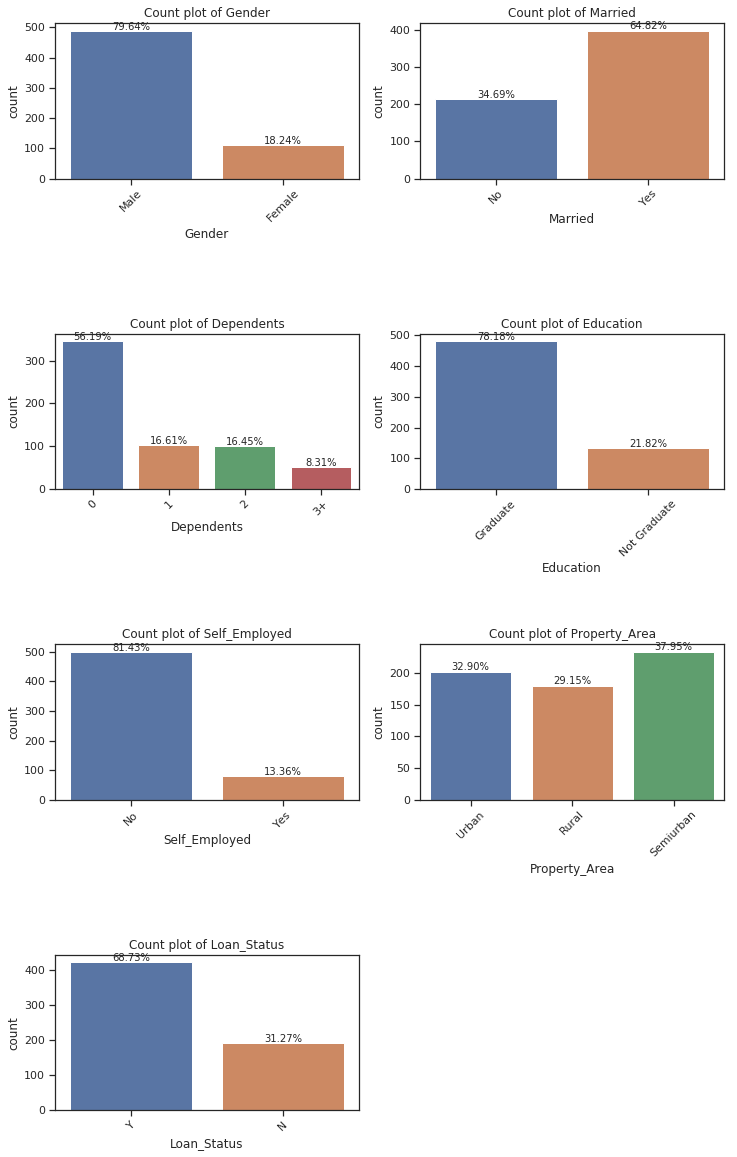

In [13]:
fig=plt.subplots(figsize=(12,20))
for i, j in enumerate(categorical_features[1:]):
    total = float(len(train_df))
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1)
    ax = sb.countplot(x=j,data = train_df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.2f}%'.format((height/total)*100),ha="center") 
    plt.xticks(rotation=45)
    plt.title("Count plot of %s"%j)

In [15]:
# list categorical features or columns
numeric_features = []

for i in train_df.columns:
    if train_df[i].dtype != object:
        numeric_features.append(i)   

print('The numeric columns are: ')
print('+_+'*35)
print(numeric_features)     
print('+_+'*35)

The numeric columns are: 
+_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_+
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
+_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_++_+


**we visualize the numeric features**

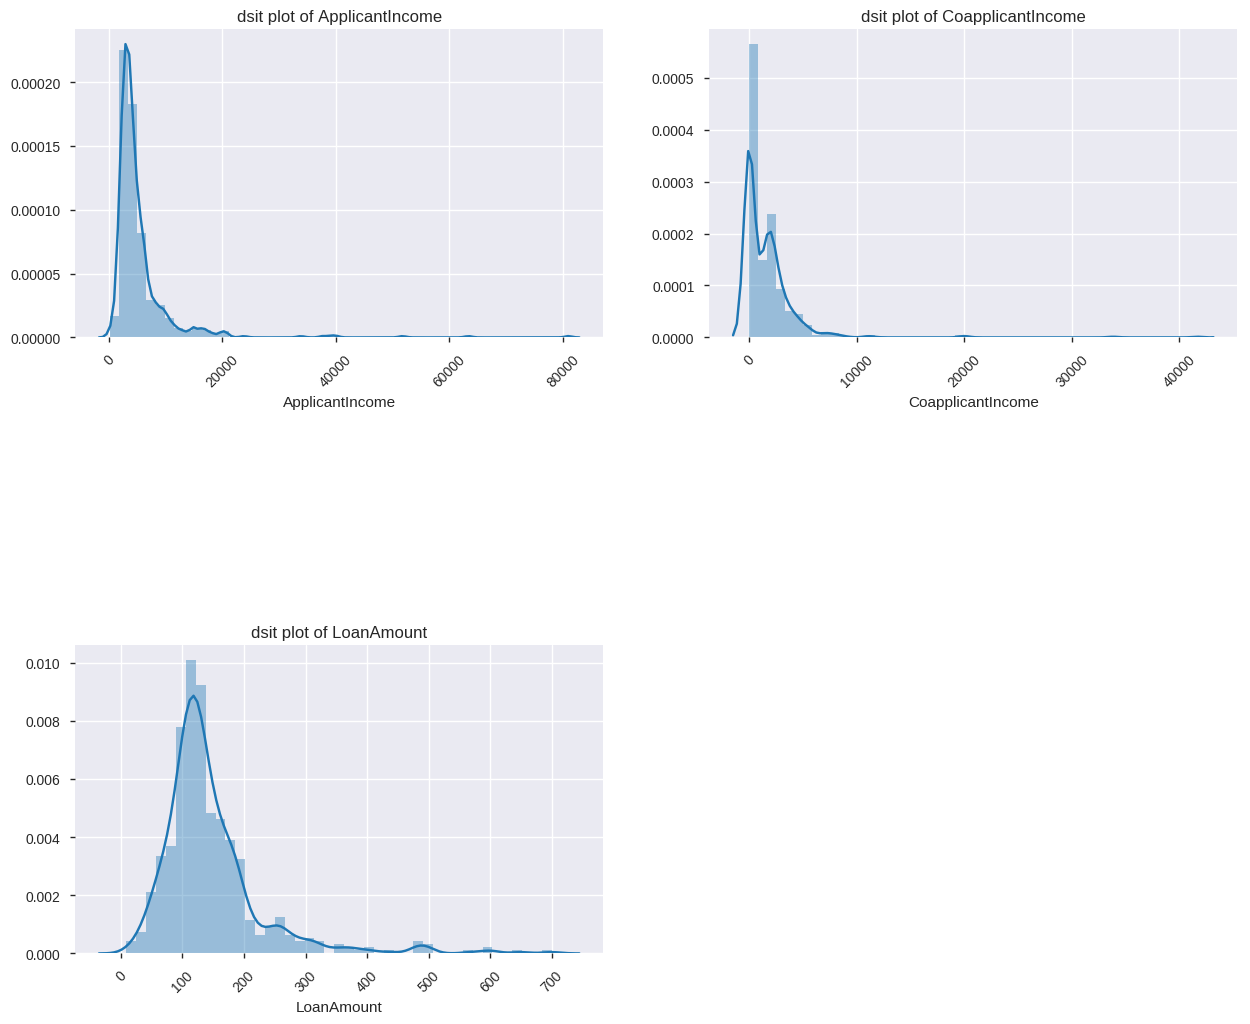

In [16]:
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(numeric_features[:-2]):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1)
    sb.distplot(train_df[j].dropna(),hist=True)
    plt.xticks(rotation=45)
    plt.title("dsit plot of %s"%j)

In [17]:
# descriptive statistics of the numeric columns

train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


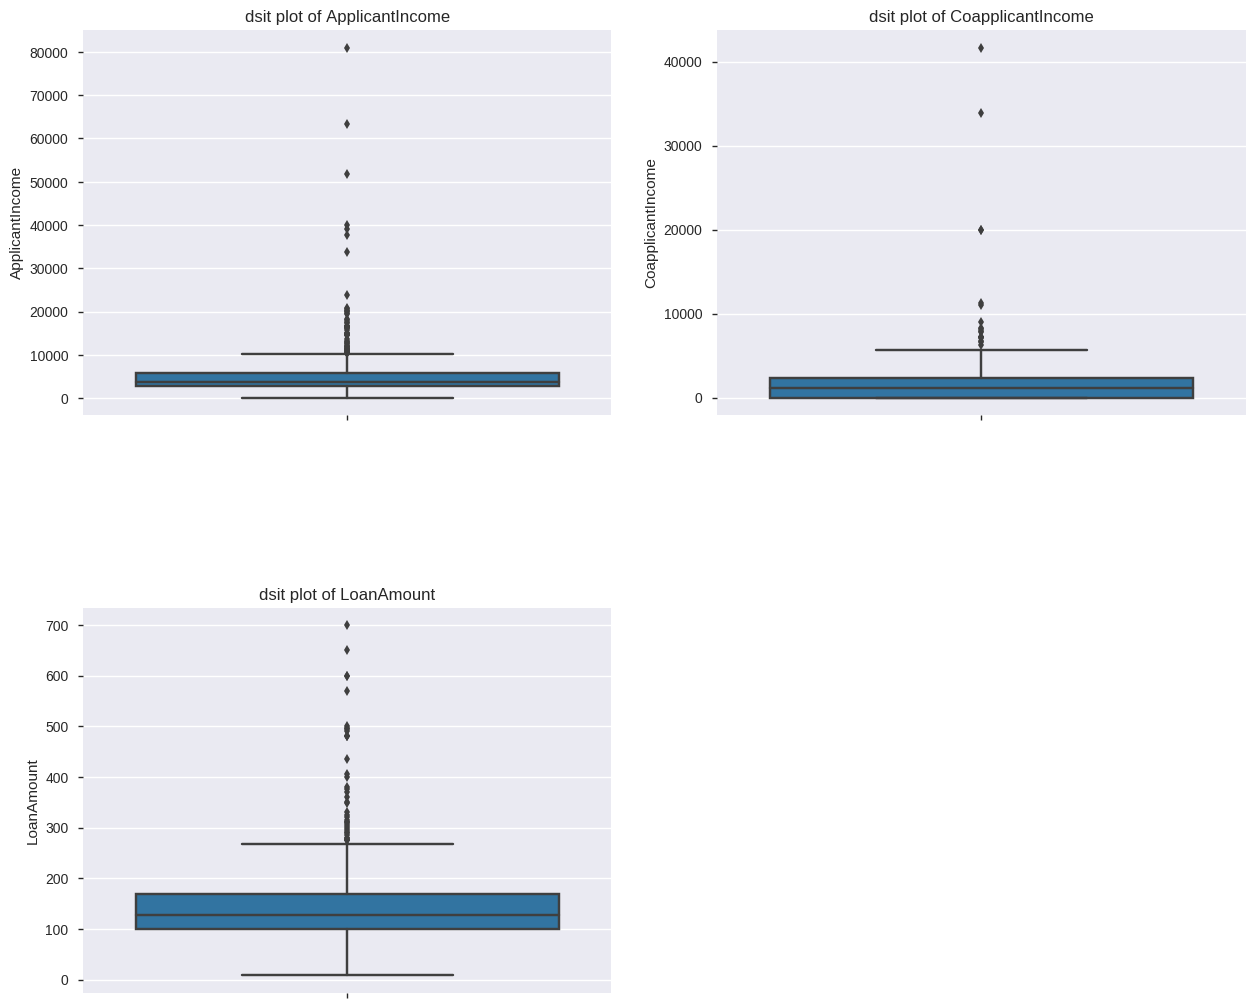

In [18]:
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(numeric_features[:-2]):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sb.boxplot(train_df[j],orient='vertical')
    plt.xticks(rotation=45)
    plt.title("dsit plot of %s"%j)

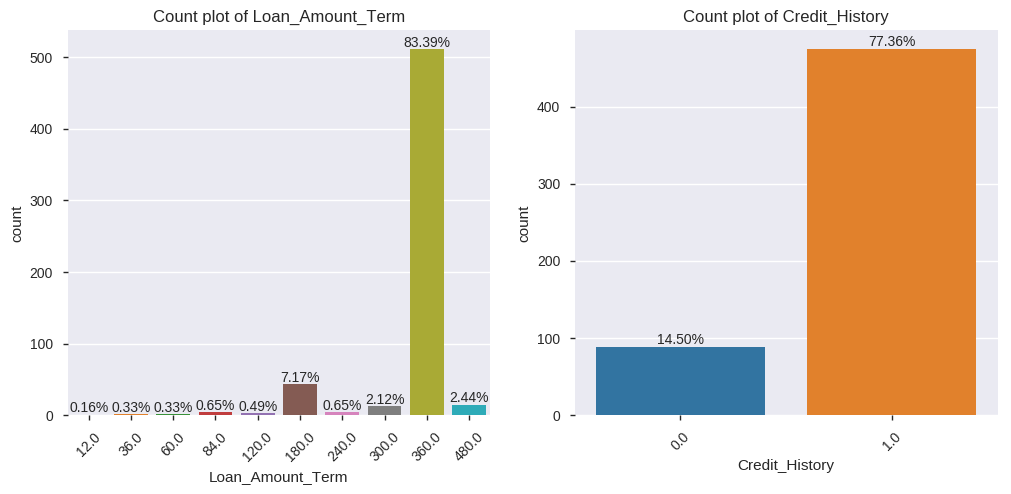

In [19]:
# we separately visualize 'Loan_Amount_Term', 'Credit_History'
s = ['Loan_Amount_Term', 'Credit_History']
fig=plt.subplots(figsize=(12,5))
for i, j in enumerate(s):
    total = float(len(train_df))
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(hspace = 1)
    ax = sb.countplot(x=j,data = train_df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.2f}%'.format((height/total)*100),ha="center") 
    plt.xticks(rotation=45)
    plt.title("Count plot of %s"%j)

### Note

<div class="alert alert-block alert-success">
We can generate a very informative report about the entire dataset in just two lines of code which can save use a lot of time. We do this by using the pandas_profiling library.
</div>

In [20]:
data_profile = pf.ProfileReport(train_df)
data_profile.to_file('loan_profile.html')

<div class="alert alert-block alert-info">
<b>Bivariate Analysis:</b> 
</div>

+*++*++*++*++*++*++*++*+
Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
+*++*++*++*++*++*++*++*+


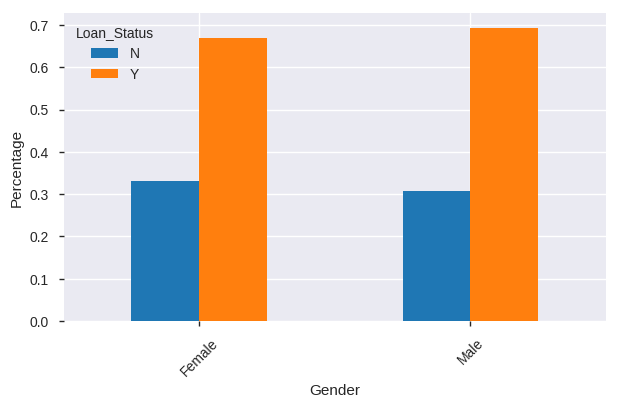

In [21]:
# Let's check how the features 
print('+*+'*8)
print(pd.crosstab(train_df['Gender'],train_df['Loan_Status']))
print('+*+'*8)
Gender=pd.crosstab(train_df['Gender'],train_df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(7,4))
plt.xlabel('Gender')
plt.xticks(rotation=45)
p = plt.ylabel('Percentage')

+*++*++*++*++*++*++*++*+
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
+*++*++*++*++*++*++*++*+


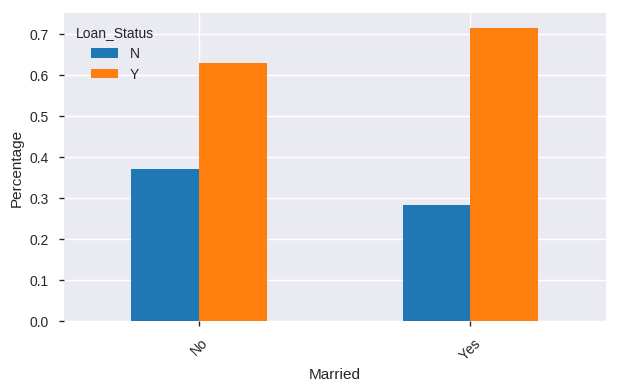

In [22]:
# Let's check how the features 
print('+*+'*8)
print(pd.crosstab(train_df['Married'],train_df['Loan_Status']))
print('+*+'*8)
Married=pd.crosstab(train_df['Married'],train_df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(7,4))
plt.xlabel('Married')
plt.xticks(rotation=45)
p = plt.ylabel('Percentage')

+*++*++*++*++*++*++*++*+
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
+*++*++*++*++*++*++*++*+


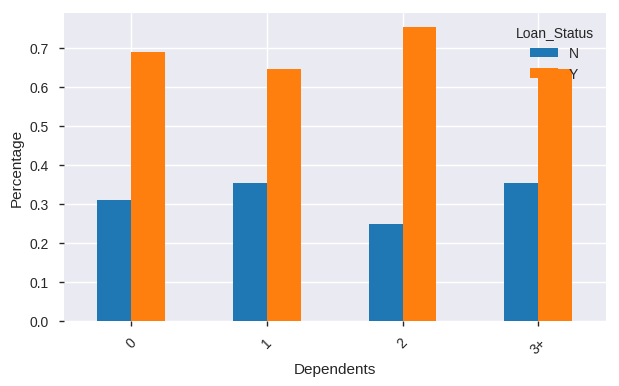

In [23]:
# Let's check how the features 
print('+*+'*8)
print(pd.crosstab(train_df['Dependents'],train_df['Loan_Status']))
print('+*+'*8)
Dependents=pd.crosstab(train_df['Dependents'],train_df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(7,4))
plt.xlabel('Dependents')
plt.xticks(rotation=45)
p = plt.ylabel('Percentage')

+*++*++*++*++*++*++*++*+
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
+*++*++*++*++*++*++*++*+


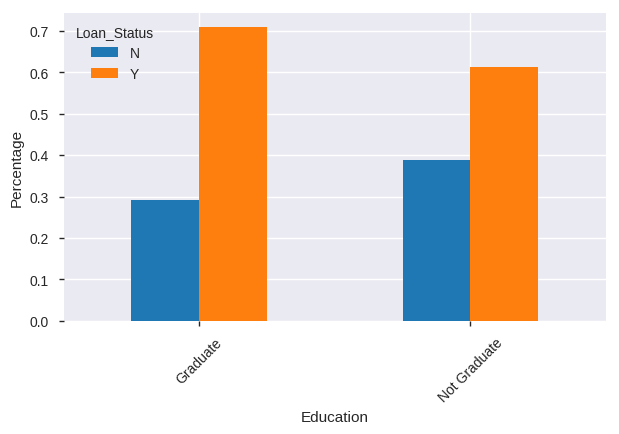

In [24]:
# Let's check how the features 
print('+*+'*8)
print(pd.crosstab(train_df['Education'],train_df['Loan_Status']))
print('+*+'*8)
Education=pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(7,4))
plt.xlabel('Education')
plt.xticks(rotation=45)
p = plt.ylabel('Percentage')

+*++*++*++*++*++*++*++*+
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
+*++*++*++*++*++*++*++*+


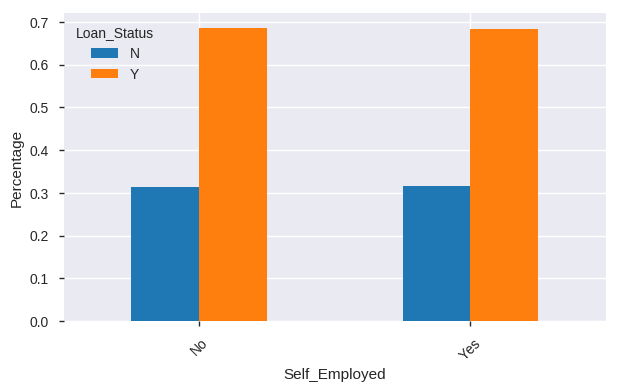

In [25]:
# Let's check how the features 
print('+*+'*8)
print(pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status']))
print('+*+'*8)
Self_Employed=pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(7,4))
plt.xlabel('Self_Employed')
plt.xticks(rotation=45)
p = plt.ylabel('Percentage')

+*++*++*++*++*++*++*++*+
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
+*++*++*++*++*++*++*++*+


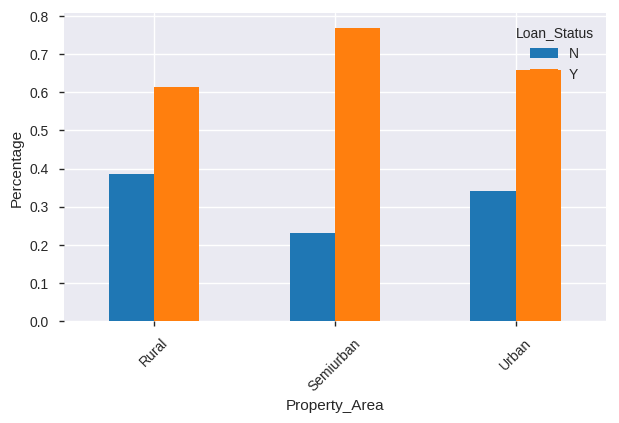

In [26]:
# Let's check how the features 
print('+*+'*8)
print(pd.crosstab(train_df['Property_Area'],train_df['Loan_Status']))
print('+*+'*8)
Property_Area=pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(7,4))
plt.xlabel('Property_Area')
plt.xticks(rotation=45)
p = plt.ylabel('Percentage')

+*++*++*++*++*++*++*++*+
Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
+*++*++*++*++*++*++*++*+


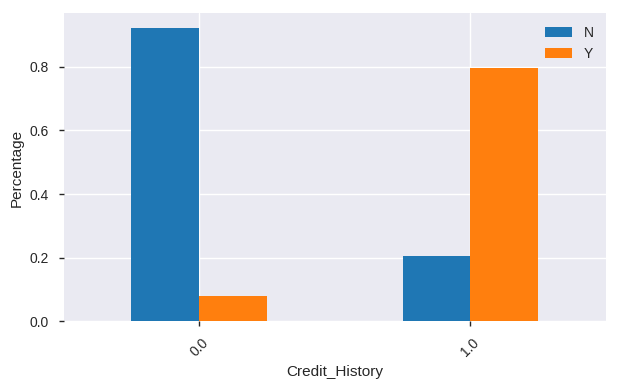

In [27]:
print('+*+'*8)
print(pd.crosstab(train_df['Credit_History'],train_df['Loan_Status']))
print('+*+'*8)
Credit_History=pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(7,4))
plt.xlabel('Credit_History')
plt.xticks(rotation=45)
plt.legend(loc='best')
p = plt.ylabel('Percentage')

## Data Preprocessing

In [28]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**missing values in Gender**

In [29]:
print(train_df['Gender'].value_counts(normalize=True))

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


Since about 81.4% of the applicants are males, we will replace the missing 13 values with the mode.

In [30]:
missgender = train_df[train_df['Gender'].isnull()].index.tolist()
train_df['Gender'].loc[missgender] = 'Male'

**missing values in Married**

In [31]:
print(train_df['Married'].value_counts(normalize=True))

Yes    0.651391
No     0.348609
Name: Married, dtype: float64


Since about 65.1% of the applicants are married, we will replace the missing 3 values with the mode.

In [32]:
missmarriage = train_df[train_df['Married'].isnull()].index.tolist()
train_df['Married'].loc[missmarriage] = 'Married'

In [35]:
missmarriage

[104, 228, 435]

**missing values in Dependents**

In [33]:
train_df['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [34]:
missdep = train_df[train_df['Dependents'].isnull()].index.tolist()
train_df['Dependents'].loc[missdep] = 0

In [37]:
missdep

[102, 104, 120, 226, 228, 293, 301, 332, 335, 346, 355, 435, 517, 571, 597]

**missing values in Self_Employed**

In [38]:
train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [39]:
missemp = train_df[train_df['Self_Employed'].isnull()].index.tolist()
train_df['Self_Employed'].loc[missemp] = 'No'

**missing values in Loan_Amount**

In [40]:
missloamt = train_df[train_df['LoanAmount'].isnull()].index.tolist()
train_df['LoanAmount'].loc[missloamt] = train_df['LoanAmount'].mean()

**missing values in Loan_Amount_Term**

In [41]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
missloterm = train_df[train_df['Loan_Amount_Term'].isnull()].index.tolist()
train_df['Loan_Amount_Term'].loc[missloterm] = train_df['Loan_Amount_Term'].mode()[0]

In [43]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].astype(int)

**missing values in Credit_History**

In [44]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [45]:
misscred = train_df[train_df['Credit_History'].isnull()].index.tolist()
train_df['Credit_History'].loc[misscred] = 1

In [46]:
train_df['Credit_History'] = train_df['Credit_History'].astype(int)

In [47]:
# we could have also combined the features to help us fill the missing values
# train_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

**Check again to verify if missing values have been well replaced**

In [48]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
# Now our data set is clean of missing values
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1,Urban,Y


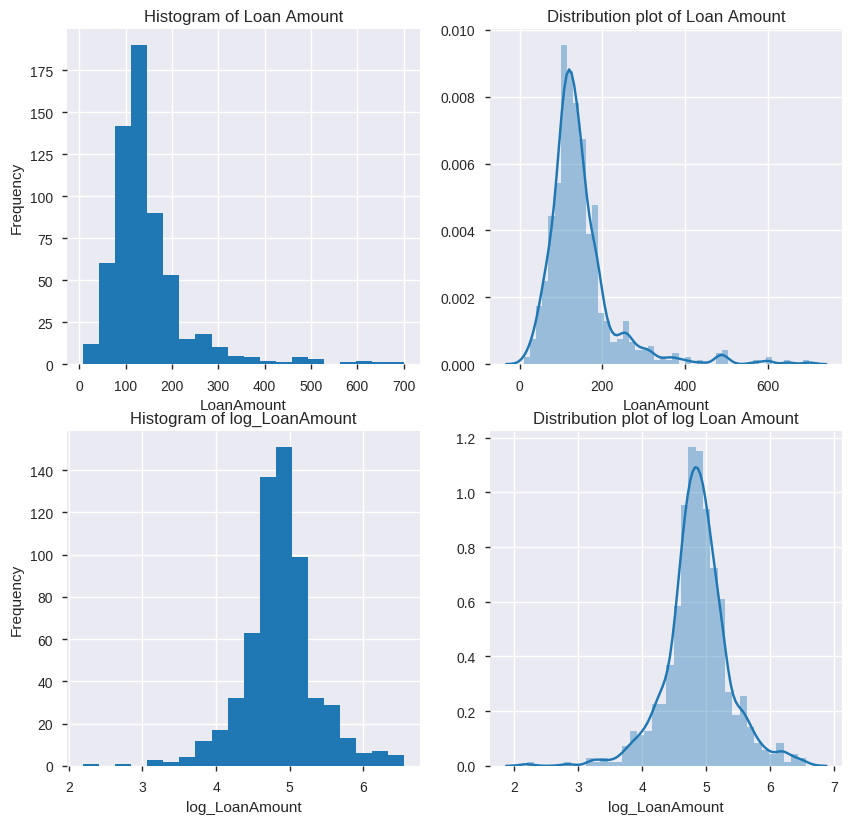

In [50]:
# Removing skewness in LoanAmount variable by log transformation
plt.figure(figsize=(10,20))
plt.subplot(421)
train_df['LoanAmount'].plot.hist(bins=20)
plt.xlabel('LoanAmount')
plt.title('Histogram of Loan Amount')

plt.subplot(422)
sb.distplot(train_df['LoanAmount'])
plt.xlabel('LoanAmount')
plt.title('Distribution plot of Loan Amount')

train_df['log_LoanAmount']  = np.log(train_df['LoanAmount'])
plt.subplot(423)
train_df['log_LoanAmount'].plot.hist(bins=20)
plt.xlabel('log_LoanAmount')
plt.title('Histogram of log_LoanAmount')

plt.subplot(424)
sb.distplot(train_df['log_LoanAmount'])
plt.xlabel('log_LoanAmount')
plt.title('Distribution plot of log Loan Amount')
plt.show()

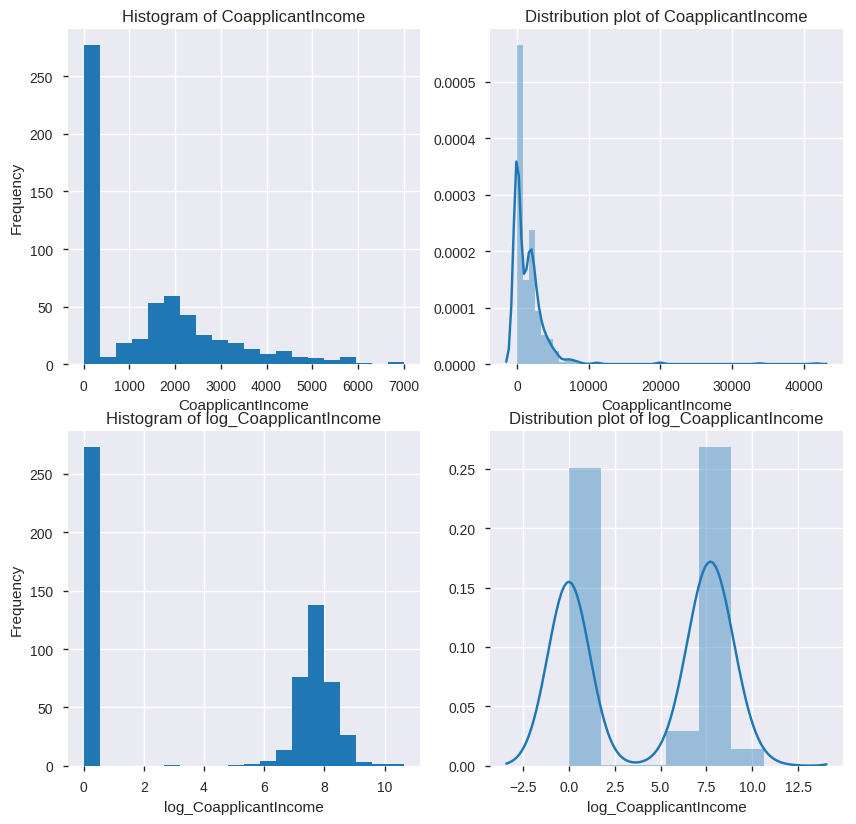

In [51]:
# Removing skewness in CoapplicantIncome variable by log transformation
plt.figure(figsize=(10,20))
plt.subplot(421)
train_df['CoapplicantIncome'].plot.hist(bins=20,range=(0,7000))
plt.xlabel('CoapplicantIncome')
plt.title('Histogram of CoapplicantIncome')

plt.subplot(422)
sb.distplot(train_df['CoapplicantIncome'])
plt.xlabel('CoapplicantIncome')
plt.title('Distribution plot of CoapplicantIncome')

train_df['log_CoapplicantIncome']  = np.log(train_df['CoapplicantIncome'] + 1)
plt.subplot(423)
train_df['log_CoapplicantIncome'].plot.hist(bins=20)
plt.xlabel('log_CoapplicantIncome')
plt.title('Histogram of log_CoapplicantIncome')

plt.subplot(424)
sb.distplot(train_df['log_CoapplicantIncome'])
plt.xlabel('log_CoapplicantIncome')
plt.title('Distribution plot of log_CoapplicantIncome')
plt.show()

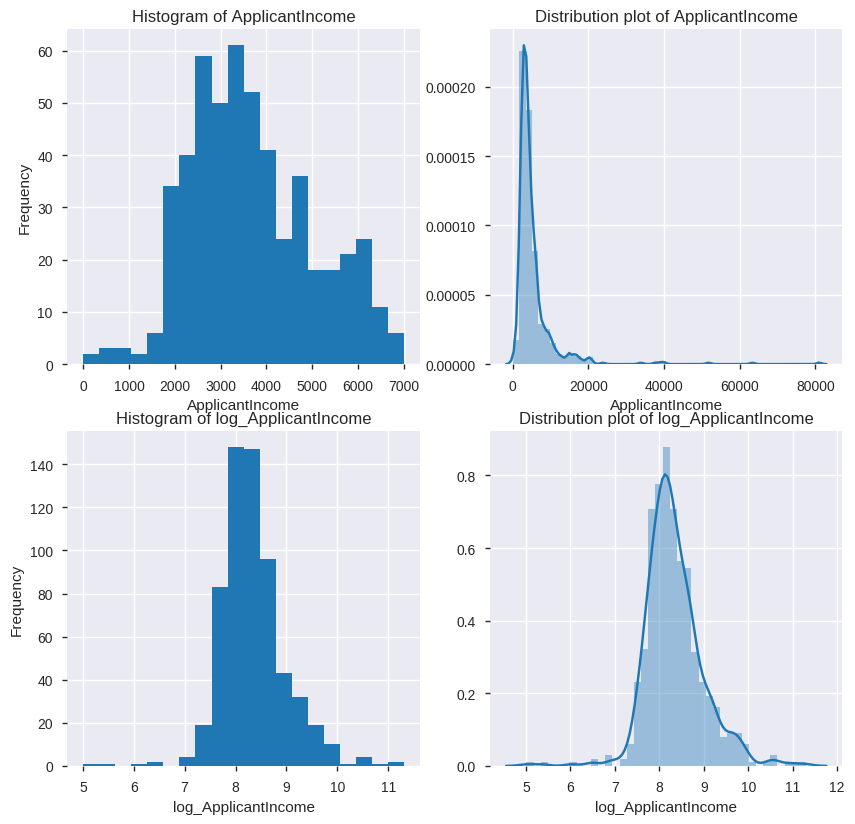

In [52]:
# Removing skewness in CoapplicantIncome variable by log transformation
plt.figure(figsize=(10,20))
plt.subplot(421)
train_df['ApplicantIncome'].plot.hist(bins=20,range=(0,7000))
plt.xlabel('ApplicantIncome')
plt.title('Histogram of ApplicantIncome')

plt.subplot(422)
sb.distplot(train_df['ApplicantIncome'])
plt.xlabel('ApplicantIncome')
plt.title('Distribution plot of ApplicantIncome')

train_df['log_ApplicantIncome']  = np.log(train_df['ApplicantIncome'])
plt.subplot(423)
train_df['log_ApplicantIncome'].plot.hist(bins=20)
plt.xlabel('log_ApplicantIncome')
plt.title('Histogram of log_ApplicantIncome')

plt.subplot(424)
sb.distplot(train_df['log_ApplicantIncome'])
plt.xlabel('log_ApplicantIncome')
plt.title('Distribution plot of log_ApplicantIncome')
plt.show()

**Since machine learning algorithmns mostly understand integers and floats, we will encode strings as numeric**

In [53]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_CoapplicantIncome,log_ApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1,Urban,Y,4.986426,0.000000,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N,4.852030,7.319202,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y,4.189655,0.000000,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,Y,4.787492,7.765993,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1,Urban,Y,4.948760,0.000000,8.699515


In [54]:
train_df['Dependents'].replace(('0','1','2','3+'),(0,1,2,3),inplace=True)
train_df['Loan_Status'].replace(('Y','N'),(1,0),inplace=True)

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_CoapplicantIncome,log_ApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1,Urban,1,4.986426,0.000000,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,0,4.852030,7.319202,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,1,4.189655,0.000000,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,1,4.787492,7.765993,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1,Urban,1,4.948760,0.000000,8.699515


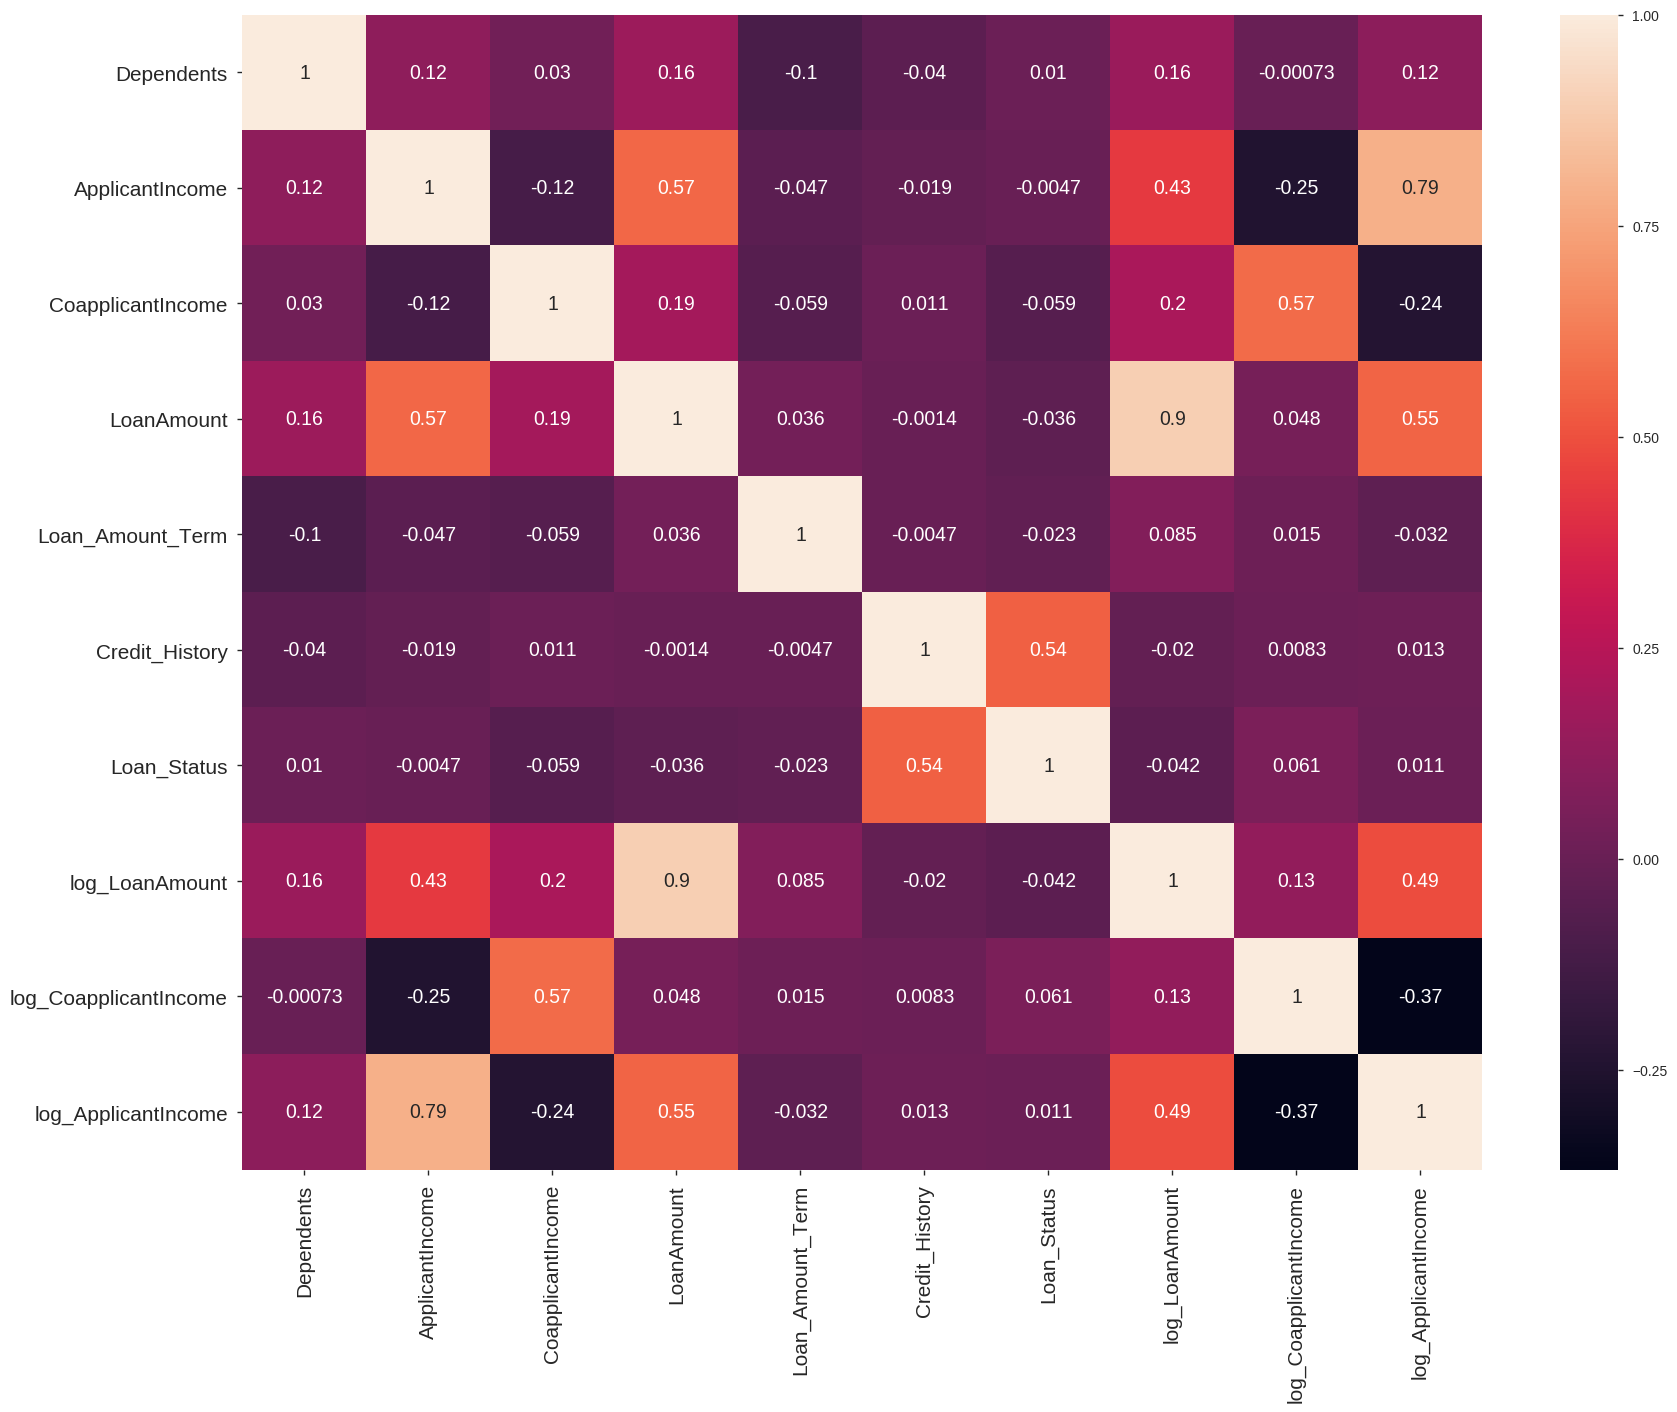

In [55]:
cor =train_df.corr()
sb.heatmap(cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values, 
           annot = True, annot_kws={'size':14})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [56]:
train = train_df.drop(['Loan_ID','CoapplicantIncome','LoanAmount','ApplicantIncome'],axis=1)
print(train.shape)

(614, 12)


In [57]:
X = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

**We will use one hot encoding to encode the categorical features**

In [58]:
X = pd.get_dummies(X)
X.shape

(614, 18)

**We will scale the data so all features will have equal scale**

In [59]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X = std.fit_transform(X)

In [60]:
y.value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

**It is to be noted from above that our target variable (Loan_Status) is very much unbalanced.**

## Machine Learning Modeling

In [61]:
# Importing packages for cross validation and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score,roc_curve,precision_score,recall_score,roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix

/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



**split train data into train and test**

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3, random_state = 111)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(429, 18)
(429,)
(185, 18)
(185,)


**Logistic Regression**

In [63]:
logreg = LogisticRegression()
model1 = logreg.fit(xtrain,ytrain)
logpred = model1.predict(xtest)
print('The accuracy is {:.2f}%'.format(accuracy_score(ytest,logpred)*100))

The accuracy is 80.54%


<div class="alert alert-block alert-danger">
<b>Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:</b> 
</div>




- **Confusion Matrix:** a table showing correct predictions and types of incorrect predictions.

- **Precision:** the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

- **Recall:** the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

- **F1 Score:** the weighted average of precision and recall.

In [ ]:
print('The precision is {}'.format(precision_score(ytest,logpred)))
print('The recall is {}'.format(recall_score(ytest,logpred)))

In [ ]:
print(classification_report(ytest,logpred))

In [ ]:
confmatrix = confusion_matrix(ytest,logpred)
plt.figure(figsize=(5,4))
confusion_matrix_df = pd.DataFrame(confmatrix, ('Not Approved', 'Approved'), ('Not Approved', 'Approved'))
heatmap = sb.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

**Hyperparameters**

<div class="alert alert-block alert-info">
<b>Hyperparameters are tuning measures that are specified for a model before training. Each type of model has its own unique set of hyperparameters. Oftentimes, the base function has defaults for these hyperparameters when they are not specified. So, it is always important to check the documentation on each model to know the complete list of hyperparameters that can be tuned.</b> 
</div>


In [ ]:
# LogisticRegression?

### Question 

Now that we know the corresponding hyperparameters to tune for our Logistic regression model, the problem now is, how do we combine these hyperparameters to know which combination will give us the best performance for our data?

### Solution 
<div class="alert alert-block alert-success">
<b>There is a super easy way to do this using three functions in scikit-learn.</b> 
</div>

- **GridSearchCV**
- **RandomizedSearchCV**
- **Pipeline** (feeds list of diff modelsand their hyperparameters to a grid or randomized search)

**GridSearch**

In [ ]:
# Let's use use gridsearch to finetune our logistic regression model
model = LogisticRegression()

# create list of candidate penalty hyperparameters
penalty = ['l1','l2']

# create range of candidate regularization hyperparameters
C = np.logspace(0,4,10)

# create a dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)

# create a grid search object and pass in the hyperparameters defined
gridsearch = GridSearchCV(model, hyperparameters, cv=5,verbose=1)

# fitting the data to the grid for searching
bestmodel = gridsearch.fit(xtrain,ytrain)

# let's see the best hyperparameter values for the best model
print(bestmodel.best_estimator_.get_params())
print('')
# mean accuracy for the best model
print(bestmodel.score(xtrain,ytrain))

In [ ]:
C

**RandomizedSearch**

In [ ]:
# Let's use use gridsearch to finetune our logistic regression model
model = LogisticRegression()

# create list of candidate penalty hyperparameters
penalty = ['l1','l2']

# create range of candidate regularization hyperparameters
C = uniform(0,4)

# create a dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)

# create a grid search object and pass in the hyperparameters defined
randomzedsearch = RandomizedSearchCV(model, hyperparameters, cv=5,verbose=1,n_iter=100,random_state=1)

# fitting the data to the grid for searching
bestmodel1 = randomzedsearch.fit(xtrain,ytrain)

# let's see the best hyperparameter values for the best model
print(bestmodel1.best_estimator_.get_params())

# mean accuracy for the best model
print(bestmodel1.score(xtrain,ytrain))

**Decision Tree Classifier**

In [ ]:
decit = DecisionTreeClassifier()
model2 = decit.fit(xtrain,ytrain)
decitpred = model2.predict(xtest)
print('The accuracy is {:.2f}%'.format(accuracy_score(ytest,decitpred)*100))
print('The precision is {}'.format(precision_score(ytest,decitpred)))
print('The recall is {}'.format(recall_score(ytest,decitpred)))

In [ ]:
print(classification_report(ytest,decitpred))

In [ ]:
confmatrix = confusion_matrix(ytest,decitpred)
plt.figure(figsize=(5,4))
confusion_matrix_df = pd.DataFrame(confmatrix, ('Not Approved', 'Approved'), ('Not Approved', 'Approved'))
heatmap = sb.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d",cmap='cividis_r')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

**K-Nearest Neigbors Classifier**

In [ ]:
KNN = KNeighborsClassifier()
model3 = KNN.fit(xtrain,ytrain)
knnpred = model3.predict(xtest)
print('The accuracy is {:.2f}%'.format(accuracy_score(ytest,knnpred)*100))
print('The precision is {}'.format(precision_score(ytest,knnpred)))
print('The recall is {}'.format(recall_score(ytest,knnpred)))

In [ ]:
print(classification_report(ytest,knnpred))

In [ ]:
confmatrix = confusion_matrix(ytest,knnpred)
plt.figure(figsize=(5,4))
confusion_matrix_df = pd.DataFrame(confmatrix, ('Not Approved', 'Approved'), ('Not Approved', 'Approved'))
heatmap = sb.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d",cmap='icefire')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

**Random Forest Classifier**

In [ ]:
rand = RandomForestClassifier()
model4 = rand.fit(xtrain,ytrain)
randpred = model4.predict(xtest)
print('The accuracy is {:.2f}%'.format(accuracy_score(ytest,randpred)*100))
print('The precision is {}'.format(precision_score(ytest,randpred)))
print('The recall is {}'.format(recall_score(ytest,randpred)))

In [ ]:
print(classification_report(ytest,randpred))

In [ ]:
confmatrix = confusion_matrix(ytest,randpred)
plt.figure(figsize=(5,4))
confusion_matrix_df = pd.DataFrame(confmatrix, ('Not Approved', 'Approved'), ('Not Approved', 'Approved'))
heatmap = sb.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d",cmap='copper')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

**Support Vector Machine**

In [ ]:
svm = SVC()
model5 = svm.fit(xtrain,ytrain)
svmpred = model5.predict(xtest)
print('The accuracy is {:.2f}%'.format(accuracy_score(ytest,svmpred)*100))
print('The precision is {}'.format(precision_score(ytest,svmpred)))
print('The recall is {}'.format(recall_score(ytest,svmpred)))

In [ ]:
print(classification_report(ytest,svmpred))

In [ ]:
confmatrix = confusion_matrix(ytest,svmpred)
plt.figure(figsize=(5,4))
confusion_matrix_df = pd.DataFrame(confmatrix, ('Not Approved', 'Approved'), ('Not Approved', 'Approved'))
heatmap = sb.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d",cmap='RdYlBu_r')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

**Gradient Boosting Classifier**

In [ ]:
gradB = GradientBoostingClassifier()
model6 = gradB.fit(xtrain,ytrain)
gradpred = model6.predict(xtest)
print('The accuracy is {:.2f}%'.format(accuracy_score(ytest,gradpred)*100))
print('The precision is {}'.format(precision_score(ytest,gradpred)))
print('The recall is {}'.format(recall_score(ytest,gradpred)))

In [ ]:
print(classification_report(ytest,gradpred))

In [ ]:
confmatrix = confusion_matrix(ytest,gradpred)
plt.figure(figsize=(5,4))
confusion_matrix_df = pd.DataFrame(confmatrix, ('Not Approved', 'Approved'), ('Not Approved', 'Approved'))
heatmap = sb.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d",cmap='afmhot')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

## Model Selection

In [ ]:
# logistic regression
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X[train_index],X[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
# pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

In [ ]:
# new_customers = pd.read_csv("bank_loan_new_customers.csv")
# print(new_customers.shape)